**Project Overview**

  For my final project, I wanted to focus on movies specifically movies from the 2000s to 2025. Why, you may ask? Simply because I love the 2000s, and also because I feel like we’re living in a time where AI is taking over a lot of basic creative work. From commercials we see every day to ads at the store, you can tell things aren’t made the way they used to be.

  So with all of that in mind, I wanted to look at movie trends across the years and see if anything has changed. I chose to compare ratings versus movie release year to see how movie quality shifts over time, especially as streaming takes over and traditional theater culture fades out. My goal was to find meaningful trends in top movies and understand how the industry has changed in this modern era.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("default")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Trending_Movies.csv to Trending_Movies.csv


In [ ]:
df = pd.read_csv("Trending_Movies.csv")
df.head()

,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count
0,1098006,Fountain of Youth,Fountain of Youth,A treasure-hunting mastermind assembles a team...,False,en,221.1354,2025-05-19,6.900,105
1,1232546,Until Dawn,Until Dawn,One year after her sister Melanie mysteriously...,False,en,287.8015,2025-04-23,6.360,283
2,1001414,Fear Street: Prom Queen,Fear Street: Prom Queen,Who will be voted queen at Shadyside High's 19...,False,en,215.8355,2025-05-23,5.361,101
3,575265,Mission: Impossible - The Final Reckoning,Mission: Impossible - The Final Reckoning,Ethan Hunt and team continue their search for ...,False,en,325.1914,2025-05-17,7.026,253
4,574475,Final Destination Bloodlines,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",False,en,535.0346,2025-05-09,7.078,392


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   overview           9747 non-null   object 
 4   adult              10000 non-null  bool   
 5   original_language  10000 non-null  object 
 6   popularity         10000 non-null  float64
 7   release_date       9844 non-null   object 
 8   vote_average       10000 non-null  float64
 9   vote_count         10000 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(5)
memory usage: 713.0+ KB


In [ ]:
df.columns

Index(['id', 'title', 'original_title', 'overview', 'adult',
       'original_language', 'popularity', 'release_date', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
def clean_movies(df):

    cleaned = df.copy()

    # Convert release_date to datetime
    cleaned["release_date"] = pd.to_datetime(cleaned["release_date"], errors="coerce")

    # Extract release year
    cleaned["release_year"] = cleaned["release_date"].dt.year

    # Drop rows without a release year or rating
    cleaned = cleaned.dropna(subset=["release_year", "vote_average"])

    # Ensure numeric types are correct
    cleaned["vote_average"] = cleaned["vote_average"].astype(float)
    cleaned["vote_count"] = cleaned["vote_count"].astype(int)
    cleaned["popularity"] = cleaned["popularity"].astype(float)

    return cleaned

# Apply the function
movies = clean_movies(df)
movies.head()


,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count,release_year
0,1098006,Fountain of Youth,Fountain of Youth,A treasure-hunting mastermind assembles a team...,False,en,221.1354,2025-05-19,6.900,105,2025.0
1,1232546,Until Dawn,Until Dawn,One year after her sister Melanie mysteriously...,False,en,287.8015,2025-04-23,6.360,283,2025.0
2,1001414,Fear Street: Prom Queen,Fear Street: Prom Queen,Who will be voted queen at Shadyside High's 19...,False,en,215.8355,2025-05-23,5.361,101,2025.0
3,575265,Mission: Impossible - The Final Reckoning,Mission: Impossible - The Final Reckoning,Ethan Hunt and team continue their search for ...,False,en,325.1914,2025-05-17,7.026,253,2025.0
4,574475,Final Destination Bloodlines,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",False,en,535.0346,2025-05-09,7.078,392,2025.0


In [ ]:
def get_movies_by_year(df, year):
    """
    Returns all movies from a specific year with their title and rating.
    Helps support year-based analysis.
    """
    return df[df["release_year"] == year][["title", "vote_average", "popularity"]]

In [ ]:
get_movies_by_year(movies_2000,2020).head()

,title,vote_average,popularity
366,Tenet,7.181,10.4768
499,Greenland,7.132,9.5673
578,Host,6.500,5.8262
648,Wonder Woman 1984,6.400,6.6699
662,Lost Bullet,6.615,7.9510


In [ ]:
#Grouping movie by year and collecting stats (2000s - 2025)

# Keep only movies released from 2000 to 2025
movies_2000 = movies[(movies["release_year"] >= 2000) & (movies["release_year"] <= 2025)]

movies_2000.head()


,id,title,original_title,overview,adult,original_language,popularity,release_date,vote_average,vote_count,release_year
0,1098006,Fountain of Youth,Fountain of Youth,A treasure-hunting mastermind assembles a team...,False,en,221.1354,2025-05-19,6.900,105,2025.0
1,1232546,Until Dawn,Until Dawn,One year after her sister Melanie mysteriously...,False,en,287.8015,2025-04-23,6.360,283,2025.0
2,1001414,Fear Street: Prom Queen,Fear Street: Prom Queen,Who will be voted queen at Shadyside High's 19...,False,en,215.8355,2025-05-23,5.361,101,2025.0
3,575265,Mission: Impossible - The Final Reckoning,Mission: Impossible - The Final Reckoning,Ethan Hunt and team continue their search for ...,False,en,325.1914,2025-05-17,7.026,253,2025.0
4,574475,Final Destination Bloodlines,Final Destination Bloodlines,"Plagued by a violent recurring nightmare, coll...",False,en,535.0346,2025-05-09,7.078,392,2025.0


In [ ]:
#Summary table for movies from the 2000s to 2025

year_summary = (
    movies_2000
    .groupby("release_year")
    .agg(
        avg_rating = ("vote_average", "mean"),
        movie_count = ("id", "count"),
        avg_popularity = ("popularity", "mean"),
        total_votes = ("vote_count", "sum")
    )
    .sort_index()
)

year_summary

,avg_rating,movie_count,avg_popularity,total_votes
release_year,,,,
2000.0,6.312278,126,4.421799,278132
2001.0,6.445097,134,4.553390,350567
2002.0,6.320289,159,4.684909,356315
2003.0,6.432845,155,4.484714,375458
2004.0,6.489167,174,4.212198,487048
2005.0,6.310520,150,4.190616,331728
2006.0,6.472578,161,4.505869,405737
2007.0,6.402343,172,4.369593,463969
2008.0,6.087149,181,3.707995,433732


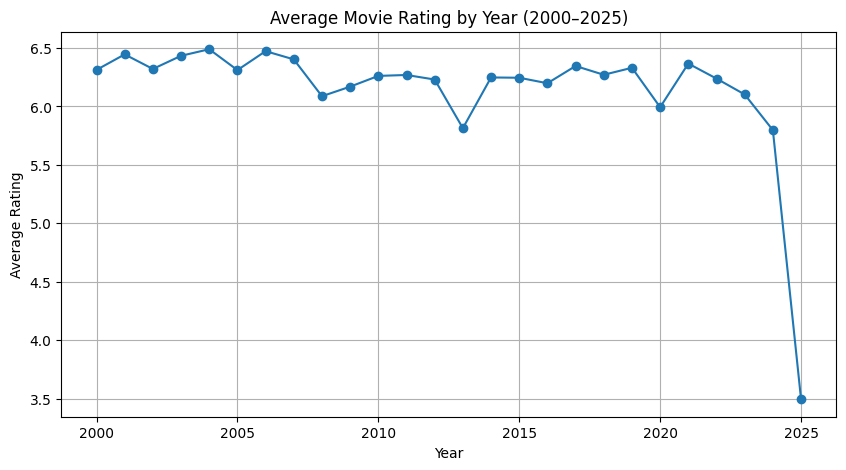

In [ ]:
#Visualization 1: Average Movie Rating by Year (2000–2025)

#line Plot of the Avg rating by the year (2000s - 2025)

plt.figure(figsize=(10,5))
plt.plot(year_summary.index, year_summary["avg_rating"], marker="o")
plt.title("Average Movie Rating by Year (2000–2025)")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

from IPython.display import HTML, display

display(HTML("""
<p style="font-size:25px; margin-top:15px;">
<b>INFO:</b> This line plot shows that the average movie rating from 2000 to 2025 stays pretty steady
between 6.0 and 6.8 for most of the years. That means movie quality stayed fairly consistent
through the early 2000s and 2010s. But once we get into the streaming era, we start to see a
big drop in ratings. With theater culture dying out and tons of new movies coming out on
streaming platforms, the overall average starts to fall in the most recent years.
</p>
"""))

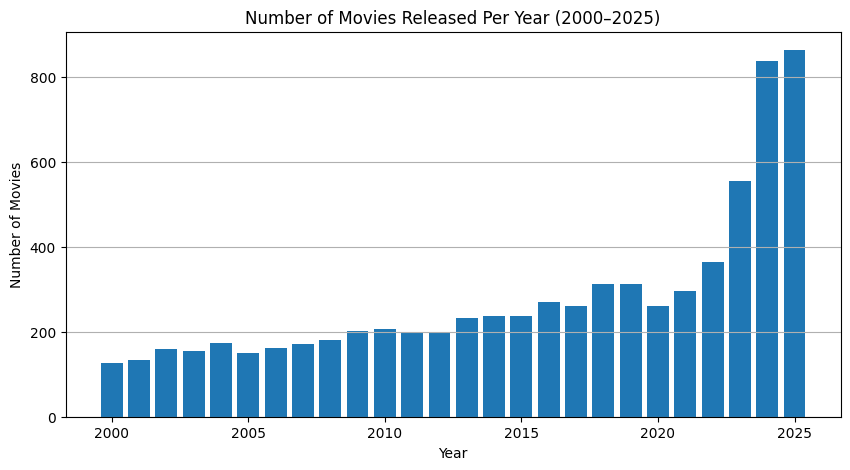

In [ ]:
#Visualization 2: Number of Movies Released Per Year (2000–2025)

#Bar Chart of number of movies released per year (2000s - 2025)

plt.figure(figsize=(10,5))
plt.bar(year_summary.index, year_summary["movie_count"])
plt.title("Number of Movies Released Per Year (2000–2025)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.grid(axis='y')
plt.show()

from IPython.display import HTML, display

display(HTML("""
<p style="font-size:25px; margin-top:15px;">
<b>INFO:</b> This bar chart shows how many movies came out each year from 2000 to 2025.
You can see a slow and steady increase at first, but then as streaming platforms take over,
the number of movies jumps a lot. By 2023–2025, the movie count explodes. This makes sense
because streaming makes it easier and cheaper to release movies, so way more films start coming
out compared to the early 2000s when everything relied heavily on theater releases.
</p>
"""))

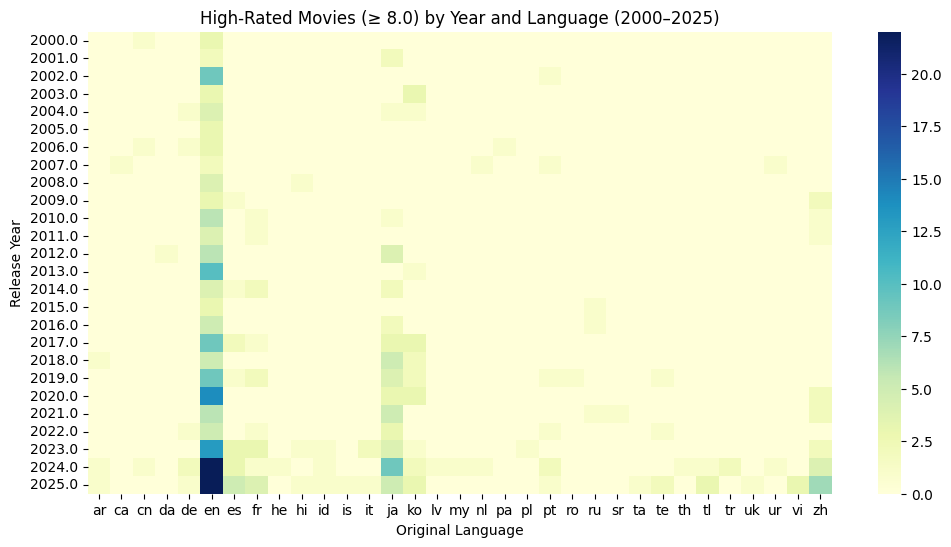

In [ ]:
#Visualization 3: High-Rated Movies (≥ 8.0) by Year and Language

#Heatmap of high rated movies by the year using 8.0 rating as the "best"

import seaborn as sns

# High-rated movies (rating ≥ 8.0)
high_rated = movies_2000[movies_2000["vote_average"] >= 8.0]

heat_data = (
    high_rated
    .pivot_table(index="release_year",
                 columns="original_language",
                 values="id",
                 aggfunc="count")
    .fillna(0)
)

plt.figure(figsize=(12,6))
sns.heatmap(heat_data, cmap="YlGnBu")
plt.title("High-Rated Movies (≥ 8.0) by Year and Language (2000–2025)")
plt.xlabel("Original Language")
plt.ylabel("Release Year")
plt.show()

from IPython.display import HTML, display

display(HTML("""
<p style="font-size:25px; margin-top:15px;">
<b>INFO:</b> This heatmap shows how many high-rated movies (8.0 or above) were released each year
across different languages. Early 2000s barely have any standout movies, but once we get deeper
into the 2010s and especially the 2020s, things start picking up. You can also see English films
dominating the chart, which lines up with what we saw in the bar chart and line plot. As more
movies get released because of streaming, the number of top-rated movies also goes up, but the
heatmap makes it clear which years had the strongest range of high-quality films.
</p>
"""))



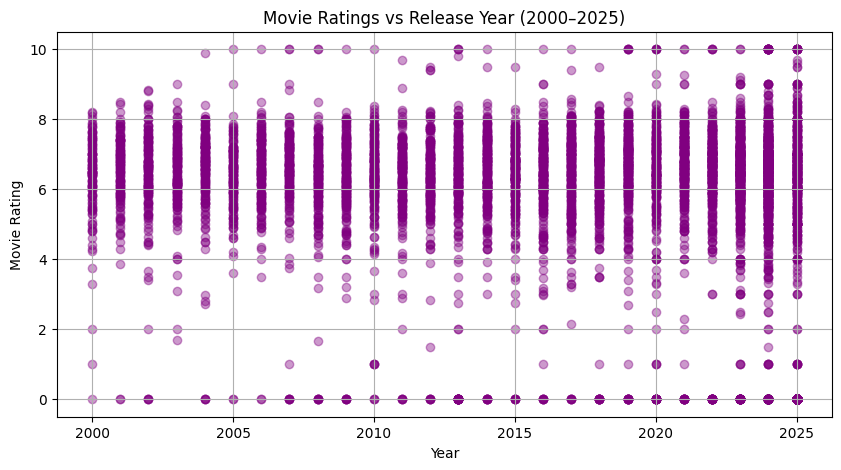

In [ ]:
#Visualization 4: Ratings vs Release Year (2000–2025)

#Scatter Plot of movie rating vs the year it was released

plt.figure(figsize=(10,5))
plt.scatter(movies_2000["release_year"], movies_2000["vote_average"],
            alpha=0.4, color="purple")

plt.title("Movie Ratings vs Release Year (2000–2025)")
plt.xlabel("Year")
plt.ylabel("Movie Rating")
plt.grid(True)
plt.show()

display(HTML("""
<p style="font-size:25px; margin-top:15px;">
<b>INFO:</b> This scatter plot shows the spread of movie ratings for every year from 2000 to 2025.
Most movies fall between 5.0 and 8.0 no matter what year it is, which connects to the line plot
showing that average ratings stay pretty stable. Every year still has a few top-rated movies
(above 8.0), so good movies are always being made.<br><br>

But once we get closer to the 2020s, the spread gets a lot wider. Some movies score really high,
and others score really low. With so many movies coming out, especially because of streaming, the
quality becomes more mixed — you get some really good ones and some really bad ones. This shows
how the modern movie industry has way more variety compared to the early 2000s.
</p>
"""))


In [ ]:
#Counts how many movies are above the average rating

avg_rating = movies_2000["vote_average"].mean()
above_avg_movies = []

for index, row in movies_2000.iterrows():
    if row["vote_average"] > avg_rating:
        above_avg_movies.append(row["title"])   # list = data structure

print("Average Rating:", round(avg_rating, 2))
print("Number of movies above average:", len(above_avg_movies))
print("Example titles above average:", above_avg_movies[:5])


Average Rating: 5.86
Number of movies above average: 5088
Example titles above average: ['Fountain of Youth', 'Until Dawn', 'Mission: Impossible - The Final Reckoning', 'Final Destination Bloodlines', 'Lilo & Stitch']


In [ ]:
#Lowest Rated Movies (Bottom 10)

def get_lowest_rated(df, n=10):
    """
    Returns the lowest-rated movies in the dataset.
    n = number of movies to return.
    """
    return df.sort_values(by="vote_average", ascending=True).head(n)[
        ["title", "release_year", "vote_average", "vote_count"]
    ]

In [ ]:
#Summary of the lowest rated movies

get_lowest_rated(movies_2000, 10)

,title,release_year,vote_average,vote_count
9738,Solvi,2020.0,0.0,0
2113,Sex Survey Results,2017.0,0.0,0
2114,Drug Bust Storm,2025.0,0.0,0
2115,Ant Mutation Crisis,2025.0,0.0,0
2119,Misie,2025.0,0.0,0
6397,Blank Canvas,2020.0,0.0,0
7891,Play Angels Vol. 1,2007.0,0.0,0
674,The Conjuring: Last Rites,2025.0,0.0,0
5697,American Sweatshop,2025.0,0.0,0
6156,Hikaru Utada Live Sessions from Air Studios,2024.0,0.0,0


**Final Conclusion**

In the end, looking at movies from 2000 to 2025 tells a pretty interesting story about how the film industry has changed. Early 2000s and 2010s stayed really consistent in terms of movie ratings nothing too crazy, nothing too low like a 0.5 rating. But once streaming took over, everything started shifting. We suddenly got way more movies each year, and with that came a lot more variety. Some movies got really good ratings, and others… not so much.

The data shows that ratings started dipping in the most recent years, which kind of matches what we’re seeing today with fast productions, remakes, and streaming-first releases. Even though quality is mixed, we’re also seeing more high-rated movies appear, especially in the 2015–2025 range, which means there’s still a lot of great filmmaking happening.

Overall, the dataset paints a picture of a movie industry transitioning from traditional theater culture into a massive streaming-driven era and the numbers show exactly how that shift affects movie output and ratings.